In [1]:
using Clapeyron
using Plots
using CSV
using DataFrames
using LaTeXStrings
using Measures
using Metaheuristics

In [2]:
@doc """
Inputs:
    model::EoSModel
    T = 292, 313, 333 / K
    w = wt% MEA
    loading = SO2 loading

Outputs:
    partial pressure of SO2 at given T, wt % MEA & SO2 loading

"""
function partial_SO2(model::EoSModel, T, w, loading)

    mw_MEA = 61.08
    mw_H2O = 18.01528

    wt_MEA = w
    wt_H2O = 1 - w

    x_MEA = (wt_MEA / mw_MEA) * (1 / ((wt_MEA / mw_MEA) + (wt_H2O / mw_H2O)))
    x_H2O = 1 - x_MEA
    solvrat = x_H2O / x_MEA

    x_MEA = 1 / (1 + loading + solvrat)
    x_SO2 = x_MEA * loading
    x_H2O = 1 - x_MEA - x_SO2

    x_bub = [x_MEA, x_H2O, x_SO2]

    calc = bubble_pressure(model, T, x_bub)
    pvap = calc[1]
    y_MEA = calc[4][1]
    y_H2O = calc[4][2]
    y_SO2 = calc[4][3]

    out_partial = y_SO2 * pvap
    return out_partial
end 


partial_SO2

In [194]:
# This has changed values based off the optimisation!!! (epsilon, lambda_r, epsilon_assoc, bondvol)
model = SAFTgammaMie([("MEA",["NH2"=>1, "CH2"=>1, "CH2OH"=>1]),("Water",["H2O"=>1]),("Sulphur Dioxide",["SO2"=>1])];
        userlocations = (Mw = [16.02285, 14.02658, 31.03392, 18.01528, 64.066],
        epsilon = [284.78 348.39 528.21 339.89 420.66;
                   348.39 473.39 423.17 423.63 301.96;
                   528.21 423.17 407.22 358.02 302.89;
                   339.89 423.63 358.02 266.68 239.53;
                   420.66 301.96 302.89 239.53 237.54], # (5,1) & (1,5)
        sigma = [3.2477, 4.8801, 3.4054, 3.0063, 3.1605],
        lambda_a = [6, 6, 6, 6, 6],
        lambda_r = [10.354 14.063 52.305 13.085 12.412;
                    14.063 19.871 21.230 100.00 17.354;
                    52.305 21.230 22.699 19.619 18.511;
                    13.085 100.00 19.619 17.020 16.085; #(4,5) & (5, 4)
                    12.412 17.354 18.511 16.085 15.213], # (5,1) & (1,5)
        vst = [1, 1, 2, 1, 3],
        S = [0.79675, 0.22932, 0.58538, 1, 0.62547],
        n_H=[2, 0, 1, 2, 1],
        n_e=[1, 0, 2, 2, 1],
        epsilon_assoc = Dict([(("NH2","H"),("NH2","e")) => 1070.80,
                              (("NH2","H"),("CH2OH","e")) => 629.88,
                              (("NH2","H"),("H2O","e")) => 1364.40,
                              (("NH2","H"),("SO2","e")) => 1011.60, 
                              (("CH2OH","H"),("NH2","e")) => 2403.78,
                              (("CH2OH","H"),("CH2OH","e")) => 2097.90,
                              (("CH2OH","H"),("H2O","e")) => 600.00,
                              (("CH2OH","H"),("SO2","e")) => 1415.90,
                              (("H2O","H"),("NH2","e")) => 1877.50,
                              (("H2O","H"),("CH2OH","e")) => 2000.60,
                              (("H2O","H"),("H2O","e")) => 1985.40,
                              (("H2O","H"),("SO2","e")) => 1343.90,
                              (("SO2","H"),("NH2","e")) => 1011.60, 
                              (("SO2","H"),("CH2OH","e")) => 1415.90,
                              (("SO2","H"),("H2O","e")) => 1343.90,
                              (("SO2","H"),("SO2","e")) => 955.58]),
        bondvol = Dict([(("NH2","H"),("NH2","e")) => 95.225e-30,
                        (("NH2","H"),("CH2OH","e")) => 346.08e-30,
                        (("NH2","H"),("H2O","e")) => 22.450e-30,
                        (("NH2","H"),("SO2","e")) => 345.89e-30,                       
                        (("CH2OH","H"),("NH2","e")) => 26.192e-30,
                        (("CH2OH","H"),("CH2OH","e")) => 62.309e-30,
                        (("CH2OH","H"),("H2O","e")) => 490.19e-30,
                        (("CH2OH","H"),("SO2","e")) => 303.270e-30,
                        (("H2O","H"),("NH2","e")) => 459.18e-30,
                        (("H2O","H"),("CH2OH","e")) => 130.02e-30,
                        (("H2O","H"),("H2O","e")) => 101.69e-30,
                        (("H2O","H"),("SO2","e")) => 353.41e-30,
                        (("SO2","H"),("NH2","e")) => 345.89e-30, 
                        (("SO2","H"),("CH2OH","e")) => 303.270e-30,
                        (("SO2","H"),("H2O","e")) => 353.41e-30,
                        (("SO2","H"),("SO2","e")) => 849.99e-30])))
                        

SAFTgammaMie{BasicIdeal} with 3 components:
 "MEA": "NH2" => 1, "CH2" => 1, "CH2OH" => 1
 "Water": "H2O" => 1
 "Sulphur Dioxide": "SO2" => 1
Group Type: SAFTgammaMie
Contains parameters: segment, shapefactor, lambda_a, lambda_r, sigma, epsilon, epsilon_assoc, bondvol

In [196]:
model.params.epsilon

5×5 PairParam{Float64}(["NH2", "CH2", "CH2OH", "H2O", "SO2"]) with values:
 284.78  348.39  528.21  339.89  420.66
 348.39  473.39  423.17  423.63  301.96
 528.21  423.17  407.22  358.02  302.89
 339.89  423.63  358.02  266.68  239.53
 420.66  301.96  302.89  239.53  237.54

In [197]:
toestimate = [
    Dict(
        :param => :epsilon,
        :indices => (1,5),
        :symmetric => true,
        :lower => 100.00,
        :upper => 800.00,
        :guess => 400.00,
    ),
    Dict(
        :param => :epsilon_assoc,
        :indices => 6,
        :symmetric => true,
        :lower => 500.00,
        :upper => 1100.00,
        :guess => 3500.00,
    )
    # ),
    # Dict(
    #     :param => :epsilon_assoc,
    #     :indices => 6,
    #     :cross_assoc => false,
    #     :lower => 500.00,
    #     :upper => 3500.00,
    #     :guess => 800.00,
    # ),
    # Dict(
    #     :param => :epsilon_assoc,
    #     :indices => 7,
    #     :cross_assoc => false,
    #     :lower => 800.00,
    #     :upper => 3500.00,
    #     :guess => 1100.00,
    # ),
    # Dict(
    #     :param => :bondvol,
    #     :indices => 6,
    #     :cross_assoc => false,
    #     :lower => 20.00,
    #     :upper => 1000.00,
    #     :guess => 650.00,
    #     :factor => 1e-30,
    # ),
    # Dict(
    #     :param => :bondvol,
    #     :indices => 7,
    #     :cross_assoc => false,
    #     :lower => 20.00,
    #     :upper => 1500.00,
    #     :guess => 1000.00,
    #     :factor => 1e-30,
    # )
]

2-element Vector{Dict{Symbol, Any}}:
 Dict(:symmetric => true, :upper => 800.0, :param => :epsilon, :indices => (1, 5), :guess => 400.0, :lower => 100.0)
 Dict(:symmetric => true, :upper => 1100.0, :param => :epsilon_assoc, :indices => 6, :guess => 3500.0, :lower => 500.0)

In [199]:
error(pred,exp) = abs(pred-exp)
estimator,objective,initial,upper,lower = Estimation(model,toestimate,["SO2_EXP_All_Data.csv"], [:vrmodel], error)
options = Options(
    iterations=150,
    x_tol=1e-05,
    f_tol=1e-05,
    debug=true
    # f_calls_limit=10000
)
method = ECA(;options=options);

In [200]:
params, model = optimize(objective, estimator, method);
println(params)

[ Info: Initializing population...
┌ Warning: f_calls_limit increased to 20000.0
└ @ Metaheuristics C:\Users\fjm21\.julia\packages\Metaheuristics\KyWxd\src\algorithms\ECA\ECA.jl:252
[ Info: Set termination criteria: convergence indicators
[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       1
  Minimum:         14422.3
  Minimizer:       [449.801, 735.861]
  Function calls:  14
  Total time:      16.6300 s
  Stop reason:

[ Info: Starting main loop...
[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       2
  Minimum:         14422.3
  Minimizer:       [449.801, 735.861]
  Function calls:  28
  Total time:      26.6370 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       3
  Minimum:         14422.3
  Minimizer:       [449.801, 735.861]
  Function calls:  42
  Total time:      38.1810 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       4
  Minimum:         14304.6
  Minimizer:       [447.271, 941.389]
  Function calls:  56
  Total time:      50.0700 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       5
  Minimum:         14304.6
  Minimizer:       [447.271, 941.389]
  Function calls:  70
  Total time:      60.9600 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       6
  Minimum:         13778
  Minimizer:       [425.725, 928.326]
  Function calls:  84
  Total time:      71.5670 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       7
  Minimum:         13778
  Minimizer:       [425.725, 928.326]
  Function calls:  98
  Total time:      81.7710 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       8
  Minimum:         13778
  Minimizer:       [425.725, 928.326]
  Function calls:  112
  Total time:      93.3120 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       9
  Minimum:         13778
  Minimizer:       [425.725, 928.326]
  Function calls:  126
  Total time:      103.9020 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       10
  Minimum:         13774.9
  Minimizer:       [424.282, 1064.94]
  Function calls:  140
  Total time:      114.0280 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       11
  Minimum:         13774.9
  Minimizer:       [424.282, 1064.94]
  Function calls:  154
  Total time:      126.4670 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       12
  Minimum:         13774.9
  Minimizer:       [424.282, 1064.94]
  Function calls:  168
  Total time:      137.4080 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       13
  Minimum:         13771.5
  Minimizer:       [425.065, 1053.64]
  Function calls:  182
  Total time:      147.4900 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       14
  Minimum:         13768.9
  Minimizer:       [424.805, 1095.22]
  Function calls:  196
  Total time:      158.3160 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       15
  Minimum:         13768.9
  Minimizer:       [424.805, 1095.22]
  Function calls:  210
  Total time:      169.1960 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       16
  Minimum:         13768.9
  Minimizer:       [424.805, 1095.22]
  Function calls:  224
  Total time:      179.3150 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       17
  Minimum:         13768.9
  Minimizer:       [424.805, 1095.22]
  Function calls:  238
  Total time:      190.3280 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       18
  Minimum:         13767.3
  Minimizer:       [425.077, 1096.01]
  Function calls:  252
  Total time:      201.1810 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       19
  Minimum:         13767.3
  Minimizer:       [425.077, 1096.01]
  Function calls:  266
  Total time:      211.2210 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       20
  Minimum:         13767.3
  Minimizer:       [425.077, 1096.01]
  Function calls:  280
  Total time:      222.2920 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       21
  Minimum:         13767.3
  Minimizer:       [425.077, 1096.01]
  Function calls:  294
  Total time:      233.3190 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       22
  Minimum:         13767
  Minimizer:       [425.055, 1099.84]
  Function calls:  308
  Total time:      243.4920 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       23
  Minimum:         13767
  Minimizer:       [425.055, 1099.84]
  Function calls:  322
  Total time:      254.7990 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       24
  Minimum:         13767
  Minimizer:       [425.06, 1099.69]
  Function calls:  336
  Total time:      266.7900 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       25
  Minimum:         13767
  Minimizer:       [425.06, 1099.69]
  Function calls:  350
  Total time:      277.4830 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       26
  Minimum:         13767
  Minimizer:       [425.058, 1099.77]
  Function calls:  364
  Total time:      288.9060 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       27
  Minimum:         13767
  Minimizer:       [425.058, 1099.77]
  Function calls:  378
  Total time:      300.7270 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       28
  Minimum:         13767
  Minimizer:       [425.059, 1099.94]
  Function calls:  392
  Total time:      312.9000 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       29
  Minimum:         13767
  Minimizer:       [425.057, 1099.94]
  Function calls:  406
  Total time:      322.9800 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       30
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  420
  Total time:      333.8680 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       31
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  434
  Total time:      344.7590 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       32
  Minimum:         13767
  Minimizer:       [425.058, 1099.99]
  Function calls:  448
  Total time:      355.1180 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       33
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  462
  Total time:      366.3270 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       34
  Minimum:         13767
  Minimizer:       [425.058, 1100.0]
  Function calls:  476
  Total time:      377.3800 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       35
  Minimum:         13767
  Minimizer:       [425.058, 1100.0]
  Function calls:  490
  Total time:      387.4390 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       36
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  504
  Total time:      398.6150 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       37
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  518
  Total time:      410.3060 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       38
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  532
  Total time:      420.6470 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       39
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  546
  Total time:      432.5840 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       40
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  560
  Total time:      444.1410 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       41
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  574
  Total time:      455.1580 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       42
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  588
  Total time:      466.1380 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       43
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  602
  Total time:      477.5460 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       44
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  616
  Total time:      490.9850 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       45
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  630
  Total time:      501.7430 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       46
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  644
  Total time:      512.4330 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       47
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  658
  Total time:      524.2500 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       48
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  672
  Total time:      535.0420 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       49
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  686
  Total time:      545.7150 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       50
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  700
  Total time:      556.8200 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       51
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  714
  Total time:      567.7980 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       52
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  728
  Total time:      578.2960 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       53
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  742
  Total time:      589.6770 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       54
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  756
  Total time:      601.5110 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       55
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  770
  Total time:      612.4080 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       56
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  784
  Total time:      624.0830 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       57
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  798
  Total time:      636.3070 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       58
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  812
  Total time:      647.4170 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       59
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  826
  Total time:      657.9090 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       60
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  840
  Total time:      671.2200 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       61
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  854
  Total time:      682.8230 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       62
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  868
  Total time:      693.4950 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       63
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  882
  Total time:      704.5370 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       64
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  896
  Total time:      716.2270 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       65
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  910
  Total time:      727.4210 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       66
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  924
  Total time:      738.4420 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       67
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  938
  Total time:      749.7680 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       68
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  952
  Total time:      761.2100 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       69
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  966
  Total time:      771.3340 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       70
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  980
  Total time:      783.0760 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       71
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  994
  Total time:      794.6650 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       72
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1008
  Total time:      805.1190 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       73
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1022
  Total time:      816.1730 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       74
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1036
  Total time:      827.8300 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       75
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1050
  Total time:      838.7500 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       76
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1064
  Total time:      851.4710 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       77
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1078
  Total time:      863.9830 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       78
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1092
  Total time:      875.2560 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       79
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1106
  Total time:      885.8430 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       80
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1120
  Total time:      896.6400 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       81
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1134
  Total time:      907.8980 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       82
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1148
  Total time:      918.9530 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       83
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1162
  Total time:      929.8180 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       84
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1176
  Total time:      941.3100 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       85
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1190
  Total time:      952.6170 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       86
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1204
  Total time:      963.1990 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       87
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1218
  Total time:      974.8580 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       88
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1232
  Total time:      986.3000 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       89
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1246
  Total time:      996.7750 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       90
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1260
  Total time:      1007.7680 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       91
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1274
  Total time:      1019.0050 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       92
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1288
  Total time:      1032.0820 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       93
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1302
  Total time:      1043.1460 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       94
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1316
  Total time:      1054.6330 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       95
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1330
  Total time:      1066.2800 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       96
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1344
  Total time:      1076.9370 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       97
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1358
  Total time:      1088.3850 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       98
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1372
  Total time:      1100.0270 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       99
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1386
  Total time:      1112.1030 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       100
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1400
  Total time:      1123.0460 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       101
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1414
  Total time:      1134.4310 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       102
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1428
  Total time:      1145.7730 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       103
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1442
  Total time:      1156.2640 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       104
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1456
  Total time:      1167.6540 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       105
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1470
  Total time:      1179.1870 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       106
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1484
  Total time:      1190.1440 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       107
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1498
  Total time:      1201.1380 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       108
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1512
  Total time:      1214.7270 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       109
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1526
  Total time:      1226.2350 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       110
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1540
  Total time:      1236.8620 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       111
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1554
  Total time:      1248.0330 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       112
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1568
  Total time:      1259.3170 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       113
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1582
  Total time:      1269.9630 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       114
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1596
  Total time:      1280.9710 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       115
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1610
  Total time:      1292.5600 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       116
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1624
  Total time:      1303.9690 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       117
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1638
  Total time:      1314.6740 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       118
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1652
  Total time:      1326.4800 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       119
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1666
  Total time:      1338.1200 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       120
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1680
  Total time:      1348.6670 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       121
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1694
  Total time:      1360.1180 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       122
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1708
  Total time:      1371.9410 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       123
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1722
  Total time:      1383.2140 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       124
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1736
  Total time:      1396.2390 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       125
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1750
  Total time:      1407.8950 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       126
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1764
  Total time:      1419.4520 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       127
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1778
  Total time:      1430.2850 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       128
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1792
  Total time:      1441.4470 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       129
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1806
  Total time:      1453.1900 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       130
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1820
  Total time:      1464.6470 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       131
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1834
  Total time:      1475.1230 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       132
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1848
  Total time:      1486.7840 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       133
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1862
  Total time:      1498.2150 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       134
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1876
  Total time:      1508.9430 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       135
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1890
  Total time:      1520.8140 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       136
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1904
  Total time:      1532.4670 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       137
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1918
  Total time:      1543.6940 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       138
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1932
  Total time:      1554.6250 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       139
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1946
  Total time:      1565.9370 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       140
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1960
  Total time:      1579.3890 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       141
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1974
  Total time:      1590.1970 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       142
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  1988
  Total time:      1601.6990 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       143
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2002
  Total time:      1613.3560 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       144
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2016
  Total time:      1624.7160 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       145
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2030
  Total time:      1635.3560 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       146
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2044
  Total time:      1647.0560 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       147
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2058
  Total time:      1658.6170 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       148
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2072
  Total time:      1669.6580 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       149
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2086
  Total time:      1680.9730 s
  Stop reason:

[ Info: Current Status of ECA


Optimization Result
===================
  Iteration:       150
  Minimum:         13767
  Minimizer:       [425.057, 1100.0]
  Function calls:  2100
  Total time:      1692.4710 s
  Stop reason:

[425.0574894430797, 1099.9999978211995]


[ Info: Termination reason: Maximum number of iterations exceeded.


In [ ]:
#@show model.params.epsilon
# @show model.params.lambda_r
# @show model.params.epsilon_assoc
# @show model.params.bondvol

model.params.bondvol = AssocParam{Float64}("bondvol")[9.5225e-29, 2.6192e-29, 3.4608e-28, 4.5918e-28, 2.245e-29, 9.99999994812133e-28, 7.114402346774002e-28, 6.2309e-29, 1.3002e-28, 4.9019e-28, 3.0327e-28, 3.0327e-28, 1.0169e-28, 3.5341e-28, 3.5341e-28, 8.4999e-28]


AssocParam{Float64}(["NH2", "CH2", "CH2OH", "H2O", "SO2"]) with 16 values:
("NH2", "e") >=< ("NH2", "H"): 9.5225e-29
("NH2", "e") >=< ("CH2OH", "H"): 2.6192e-29
("NH2", "H") >=< ("CH2OH", "e"): 3.4608e-28
("NH2", "e") >=< ("H2O", "H"): 4.5918e-28
("NH2", "H") >=< ("H2O", "e"): 2.245e-29
("NH2", "e") >=< ("SO2", "H"): 9.99999994812133e-28
("NH2", "H") >=< ("SO2", "e"): 7.114402346774002e-28
("CH2OH", "e") >=< ("CH2OH", "H"): 6.2309e-29
("CH2OH", "e") >=< ("H2O", "H"): 1.3002e-28
("CH2OH", "H") >=< ("H2O", "e"): 4.9019e-28
("CH2OH", "e") >=< ("SO2", "H"): 3.0327e-28
("CH2OH", "H") >=< ("SO2", "e"): 3.0327e-28
("H2O", "e") >=< ("H2O", "H"): 1.0169e-28
("H2O", "e") >=< ("SO2", "H"): 3.5341e-28
("H2O", "H") >=< ("SO2", "e"): 3.5341e-28
("SO2", "e") >=< ("SO2", "H"): 8.4999e-28

In [166]:
data1 = CSV.read("SO2_EXP_0.1wt.csv", DataFrame; header=false)
data2 = CSV.read("SO2_EXP_0.2wt.csv", DataFrame; header=false)
data3 = CSV.read("SO2_EXP_0.3wt.csv", DataFrame; header=false)
data4 = CSV.read("SO2_EXP_0.4wt.csv", DataFrame; header=false)
data5 = CSV.read("SO2_EXP_0.5wt.csv", DataFrame; header=false)

data1 .= convert.(Float64, data1)
data2 .= convert.(Float64, data2)
data3 .= convert.(Float64, data3)
data4 .= convert.(Float64, data4)
data5 .= convert.(Float64, data5);

#Data is in the order temp, partial pressure, wtMEA, Loading SO2

In [201]:
wt_MEA = [0.1, 0.2, 0.3, 0.4, 0.5]
wt_H2O = 1 .- wt_MEA

mw_MEA = 61.08
mw_H2O = 18.01528

x_MEA = (wt_MEA ./ mw_MEA) .* (1 ./ ((wt_MEA ./ mw_MEA) .+ (wt_H2O ./ mw_H2O)))
x_H2O = 1 .- x_MEA
solvrat = x_H2O ./ x_MEA



5-element Vector{Float64}:
 30.514096922168292
 13.56182085429702
  7.911062165006595
  5.085682820361383
  3.3904552135742545

In [202]:

load = LinRange(0, 0.5, 100) #these are the ratio of SO2 mols to MEA mols in solution

N = length(load)

# intialise new composition vectors
x_MEA = zeros(N, 5)
x_H2O = zeros(N, 5)
x_SO2 = zeros(N, 5)
z = zeros(N, 15)

# calculate the new liquid compositions at these loadings
for i in 1:5
    x_MEA[:,i] = 1 ./ (1 .+ load .+ solvrat[i])
    x_SO2[:,i] = x_MEA[:,i] .* load
    x_H2O[:,i] = 1 .- x_MEA[:,i] .- x_SO2[:,i]
    ind = 3*(i-1) + 1
    z[:, ind] = x_MEA[:,i]
    z[:, ind + 1] = x_H2O[:,i]
    z[:, ind + 2] = x_SO2[:,i]
end

# each 3 columns represents the composition
# under loading at a different MEA wt in solution

In [203]:

T = [293, 313, 333]

pvap1 = zeros(N, 3)
y1 = zeros(N, 3, 3)
partial1 = zeros(N, 3)

pvap2 = zeros(N, 3)
y2 = zeros(N, 3, 3)
partial2 = zeros(N, 3)

pvap3 = zeros(N, 3)
y3 = zeros(N, 3, 3)
partial3 = zeros(N, 3)

pvap4 = zeros(N, 3)
y4 = zeros(N, 3, 3)
partial4 = zeros(N, 3)

pvap5 = zeros(N, 3)
y5 = zeros(N, 3, 3)
partial5 = zeros(N, 3)

for j in 1:3
        
    for i in 1:N

        # ------------- Wt = 0.1 ----------------#
        x_bub = z[i, 1:3]
        calc = bubble_pressure(model, T[j], x_bub)
        pvap1[i, j] = calc[1]
        y1[i, 1, j] = calc[4][1]
        y1[i, 2, j] = calc[4][2]
        y1[i, 3, j] = calc[4][3]

        # ------------- Wt = 0.2 ----------------#
        x_bub = z[i, 4:6]
        calc = bubble_pressure(model, T[j], x_bub)
        pvap2[i, j] = calc[1]
        y2[i, 1, j] = calc[4][1]
        y2[i, 2, j] = calc[4][2]
        y2[i, 3, j] = calc[4][3]

        # ------------- Wt = 0.3 ----------------#
        x_bub = z[i, 7:9]
        calc = bubble_pressure(model, T[j], x_bub)
        pvap3[i, j] = calc[1]
        y3[i, 1, j] = calc[4][1]
        y3[i, 2, j] = calc[4][2]
        y3[i, 3, j] = calc[4][3]

        # ------------- Wt = 0.4 ----------------#
        x_bub = z[i, 10:12]
        calc = bubble_pressure(model, T[j], x_bub)
        pvap4[i, j] = calc[1]
        y4[i, 1, j] = calc[4][1]
        y4[i, 2, j] = calc[4][2]
        y4[i, 3, j] = calc[4][3]

        # ------------- Wt = 0.5 ----------------#
        x_bub = z[i, 13:15]
        calc = bubble_pressure(model, T[j], x_bub)
        pvap5[i, j] = calc[1]
        y5[i, 1, j] = calc[4][1]
        y5[i, 2, j] = calc[4][2]
        y5[i, 3, j] = calc[4][3]

    end

end

# --------------- Wt = 0.1 ------------------ #
partial1T1 = pvap1[2:100, 1] .* y5[2:100, 3, 1]
partial1T2 = pvap1[2:100, 2] .* y5[2:100, 3, 2]
partial1T3 = pvap1[2:100, 3] .* y5[2:100, 3, 3]

# --------------- Wt = 0.2 ------------------ #
partial2T1 = pvap2[2:100, 1] .* y5[2:100, 3, 1]
partial2T2 = pvap2[2:100, 2] .* y5[2:100, 3, 2]
partial2T3 = pvap2[2:100, 3] .* y5[2:100, 3, 3]

# --------------- Wt = 0.3 ------------------ #
partial3T1 = pvap3[2:100, 1] .* y5[2:100, 3, 1]
partial3T2 = pvap3[2:100, 2] .* y5[2:100, 3, 2]
partial3T3 = pvap3[2:100, 3] .* y5[2:100, 3, 3]

# --------------- Wt = 0.4 ------------------ #
partial4T1 = pvap4[2:100, 1] .* y5[2:100, 3, 1]
partial4T2 = pvap4[2:100, 2] .* y5[2:100, 3, 2]
partial4T3 = pvap4[2:100, 3] .* y5[2:100, 3, 3]

# --------------- Wt = 0.5 ------------------ #
partial5T1 = pvap5[2:100, 1] .* y5[2:100, 3, 1]
partial5T2 = pvap5[2:100, 2] .* y5[2:100, 3, 2]
partial5T3 = pvap5[2:100, 3] .* y5[2:100, 3, 3]


loadfil = load[2:100];

#### Wt = 0.1

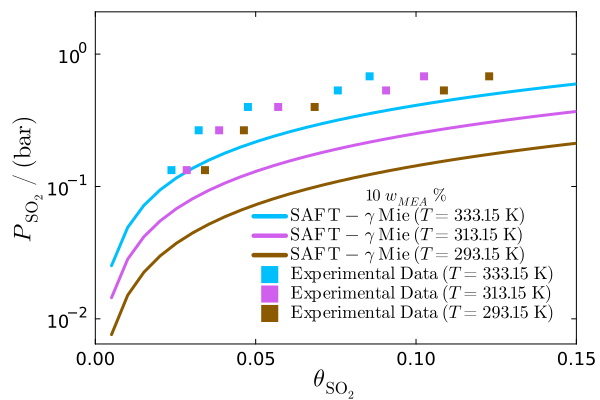

In [204]:
plt = plot(grid = :off, 
            framestyle = :box, 
            foreground_color_legend = nothing, 
            legend_font = font(12),
            xtickfont = font(12),
            ytickfont = font(12),
            yaxis = :log,
            legend =:bottomright,
            legend_background_color = :transparent,
            legendtitle = L"10 \ w_{MEA} \ \%",
            left_margin = 4mm,
            right_margin = 4mm,
            xguidefontsize=16,
            yguidefontsize=16,
            xlims = (0, 0.15))

plot!(plt, loadfil, partial1T3./1e5,
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 333.15 \ \mathrm{K})")

plot!(plt, loadfil, partial1T2./1e5, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 313.15 \ \mathrm{K})")

plot!(plt, loadfil, partial1T1./1e5, 
      color = "orange4", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 293.15 \ \mathrm{K})")

plot!(plt, data1[11:15,4], data1[11:15, 2]./1e5, 
      seriestype = :scatter, 
      color = "deepskyblue1", 
      markerstrokecolor = "deepskyblue1",
      marker = :square, 
      markerstrokewidth = 1,
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 333.15 \ \mathrm{K})")

plot!(plt, data1[6:10,4], data1[6:10, 2]./1e5, 
      seriestype = :scatter, 
      color = "mediumorchid2", 
      markerstrokecolor = "mediumorchid2",
      marker = :square,
      markerstrokewidth = 1, 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 313.15 \ \mathrm{K})")

plot!(plt, data1[1:5,4], data1[1:5, 2]./1e5, 
      seriestype = :scatter, 
      color = "orange4", 
      markerstrokecolor = "orange4", 
      line = (:scatter, 0.4), 
      marker = :square,
      markerstrokewidth = 1,
      label = L"\mathrm{Experimental \ Data} \ (T = 293.15 \ \mathrm{K})")

xlabel!(plt, L"\theta_{\mathrm{SO_2}}")
ylabel!(plt, L"P_{\mathrm{SO_2}} \ / \ \mathrm{(bar)}")

#savefig(plt, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_10MEA.png")

#### Wt = 0.2

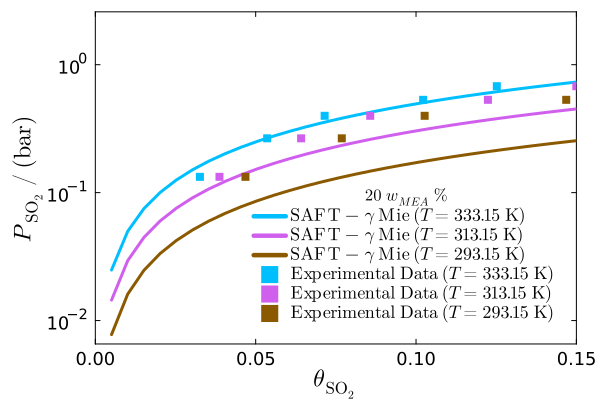

In [205]:
plt2 = plot(grid = :off, 
            framestyle = :box, 
            foreground_color_legend = nothing, 
            legend_font = font(12),
            xtickfont = font(12),
            ytickfont = font(12),
            yaxis = :log,
            legend =:bottomright,
            legend_background_color = :transparent,
            legendtitle = L"20 \ w_{MEA} \ \%",
            left_margin = 4mm,
            right_margin = 4mm,
            xguidefontsize=16,
            yguidefontsize=16,
            xlims = (0, 0.15))

plot!(plt2, loadfil, partial2T3./1e5, 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 333.15 \ \mathrm{K})")

plot!(plt2, loadfil, partial2T2./1e5, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 313.15 \ \mathrm{K})")

plot!(plt2, loadfil, partial2T1./1e5, 
      color = "orange4", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 293.15 \ \mathrm{K})")

plot!(plt2, data2[11:15,4], data2[11:15, 2]./1e5, 
      seriestype = :scatter, 
      color = "deepskyblue1", 
      marker = :square,
      markerstrokecolor = "deepskyblue1", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 333.15 \ \mathrm{K})")

plot!(plt2, data2[6:10,4], data2[6:10, 2]./1e5, 
      seriestype = :scatter, 
      color = "mediumorchid2", 
      marker = :square,
      markerstrokecolor = "mediumorchid2", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 313.15 \ \mathrm{K})")

plot!(plt2, data2[1:5,4], data2[1:5, 2]./1e5, 
      seriestype = :scatter, 
      color = "orange4", 
      marker = :square,
      markerstrokecolor = "orange4", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 293.15 \ \mathrm{K})")


xlabel!(plt2, L"\theta_{\mathrm{SO_2}}")
ylabel!(plt2, L"P_{\mathrm{SO_2}} \ / \ \mathrm{(bar)}")

#savefig(plt2, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_20MEA.png")


#### Wt = 0.3

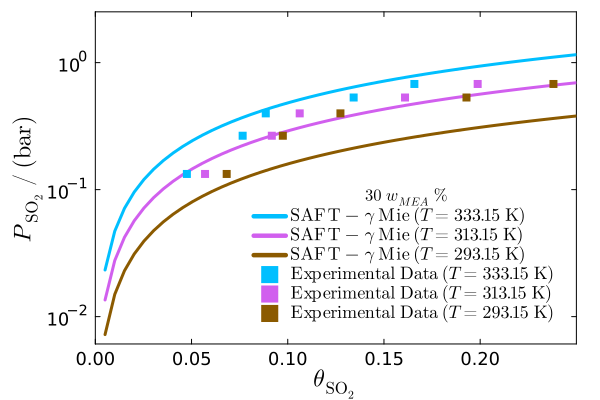

In [206]:
plt3 = plot(grid = :off, 
            framestyle = :box, 
            foreground_color_legend = nothing, 
            legend_font = font(12),
            xtickfont = font(12),
            ytickfont = font(12),
            yaxis = :log,
            legend =:bottomright,
            legend_background_color = :transparent,
            legendtitle = L"30 \ w_{MEA} \ \%",
            left_margin = 4mm,
            right_margin = 4mm,
            xguidefontsize=16,
            yguidefontsize=16,
            xlims = (0, 0.25))

plot!(plt3, loadfil, partial3T3./1e5, 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 333.15 \ \mathrm{K})")

plot!(plt3, loadfil, partial3T2./1e5, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 313.15 \ \mathrm{K})")

plot!(plt3, loadfil, partial3T1./1e5, 
      color = "orange4", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 293.15 \ \mathrm{K})")

plot!(plt3, data3[11:15,4], data3[11:15, 2]./1e5, 
      seriestype = :scatter, 
      color = "deepskyblue1", 
      markerstrokecolor = "deepskyblue1",
      marker = :square, 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 333.15 \ \mathrm{K})")

plot!(plt3, data3[6:10,4], data3[6:10, 2]./1e5, 
      seriestype = :scatter, 
      color = "mediumorchid2", 
      markerstrokecolor = "mediumorchid2", 
      marker = :square,
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 313.15 \ \mathrm{K})")

plot!(plt3, data3[1:5,4], data3[1:5, 2]./1e5, 
      seriestype = :scatter, 
      color = "orange4", 
      markerstrokecolor = "orange4", 
      marker = :square,
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 293.15 \ \mathrm{K})")

xlabel!(plt3, L"\theta_{\mathrm{SO_2}}")
ylabel!(plt3, L"P_{\mathrm{SO_2}} \ / \ \mathrm{(bar)}")
#savefig(plt3, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_30MEA.png")

#### Wt = 0.4

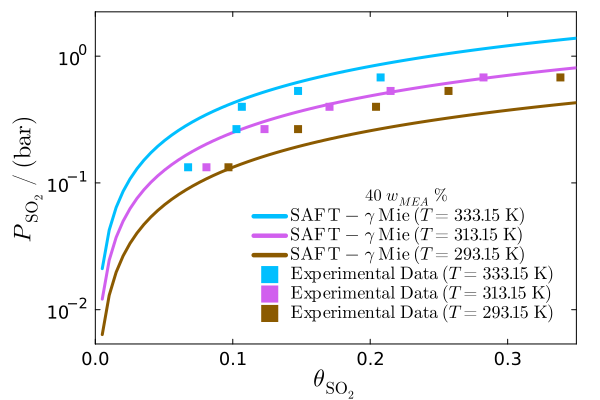

In [207]:
plt4 = plot(grid = :off, 
            framestyle = :box, 
            foreground_color_legend = nothing, 
            legend_font = font(12),
            xtickfont = font(12),
            ytickfont = font(12),
            yaxis = :log,
            legend =:bottomright,
            legend_background_color = :transparent,
            legendtitle = L"40 \ w_{MEA} \ \%",
            left_margin = 4mm,
            right_margin = 4mm,
            xguidefontsize=16,
            yguidefontsize=16,
            xlims = (0, 0.35))

plot!(plt4, loadfil, partial4T3./1e5, 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 333.15 \ \mathrm{K})")

plot!(plt4, loadfil, partial4T2./1e5, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 313.15 \ \mathrm{K})")

plot!(plt4, loadfil, partial4T1./1e5, 
      color = "orange4", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 293.15 \ \mathrm{K})")

plot!(plt4, data4[11:15,4], data4[11:15, 2]./1e5, 
      seriestype = :scatter, 
      color = "deepskyblue1",
      marker = :square, 
      markerstrokecolor = "deepskyblue1", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 333.15 \ \mathrm{K})")


plot!(plt4, data4[6:10,4], data4[6:10, 2]./1e5, 
      seriestype = :scatter, 
      color = "mediumorchid2", 
      marker = :square, 
      markerstrokecolor = "mediumorchid2", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 313.15 \ \mathrm{K})")


plot!(plt4, data4[1:5,4], data4[1:5, 2]./1e5, 
      seriestype = :scatter, 
      color = "orange4", 
      marker = :square, 
      markerstrokecolor = "orange4", 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 293.15 \ \mathrm{K})")

xlabel!(plt4, L"\theta_{\mathrm{SO_2}}")
ylabel!(plt4, L"P_{\mathrm{SO_2}} \ / \ \mathrm{(bar)}")

#savefig(plt4, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_40MEA.png")

#### Wt = 0.5

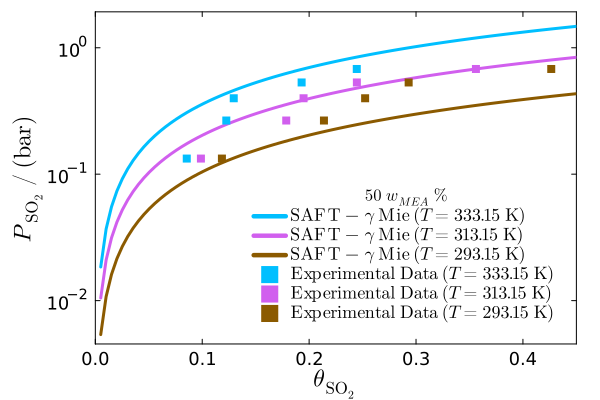

In [208]:
plt5 = plot(grid = :off, 
            framestyle = :box, 
            foreground_color_legend = nothing, 
            legend_font = font(12),
            xtickfont = font(12),
            ytickfont = font(12),
            yaxis = :log,
            legend =:bottomright,
            legend_background_color = :transparent,
            legendtitle = L"50 \ w_{MEA} \ \%",
            left_margin = 4mm,
            right_margin = 4mm,
            xguidefontsize=16,
            yguidefontsize=16,
            xlims = (0, 0.45))

plot!(plt5, loadfil, partial5T3./1e5, 
      color = "deepskyblue1", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 333.15 \ \mathrm{K})")

plot!(plt5, loadfil, partial5T2./1e5, 
      color = "mediumorchid2", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 313.15 \ \mathrm{K})")

plot!(plt5, loadfil, partial5T1./1e5, 
      color = "orange4", 
      line = (:path, 3), 
      label = L"\mathrm{SAFT-\gamma \ Mie} \ (T = 293.15 \ \mathrm{K})")

plot!(plt5, data5[11:15,4], data5[11:15, 2]./1e5, 
      seriestype = :scatter, 
      color = "deepskyblue1", 
      markerstrokecolor = "deepskyblue1",
      marker = :square, 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 333.15 \ \mathrm{K})")

plot!(plt5, data5[6:10,4], data5[6:10, 2]./1e5, 
      seriestype = :scatter, 
      color = "mediumorchid2", 
      markerstrokecolor = "mediumorchid2",
      marker = :square, 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 313.15 \ \mathrm{K})")


plot!(plt5, data5[1:5,4], data5[1:5, 2]./1e5, 
      seriestype = :scatter, 
      color = "orange4", 
      markerstrokecolor = "orange4",
      marker = :square, 
      line = (:scatter, 0.4), 
      label = L"\mathrm{Experimental \ Data} \ (T = 293.15 \ \mathrm{K})")

xlabel!(plt5, L"\theta_{\mathrm{SO_2}}")
ylabel!(plt5, L"P_{\mathrm{SO_2}} \ / \ \mathrm{(bar)}")

#savefig(plt5, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_50MEA.png")

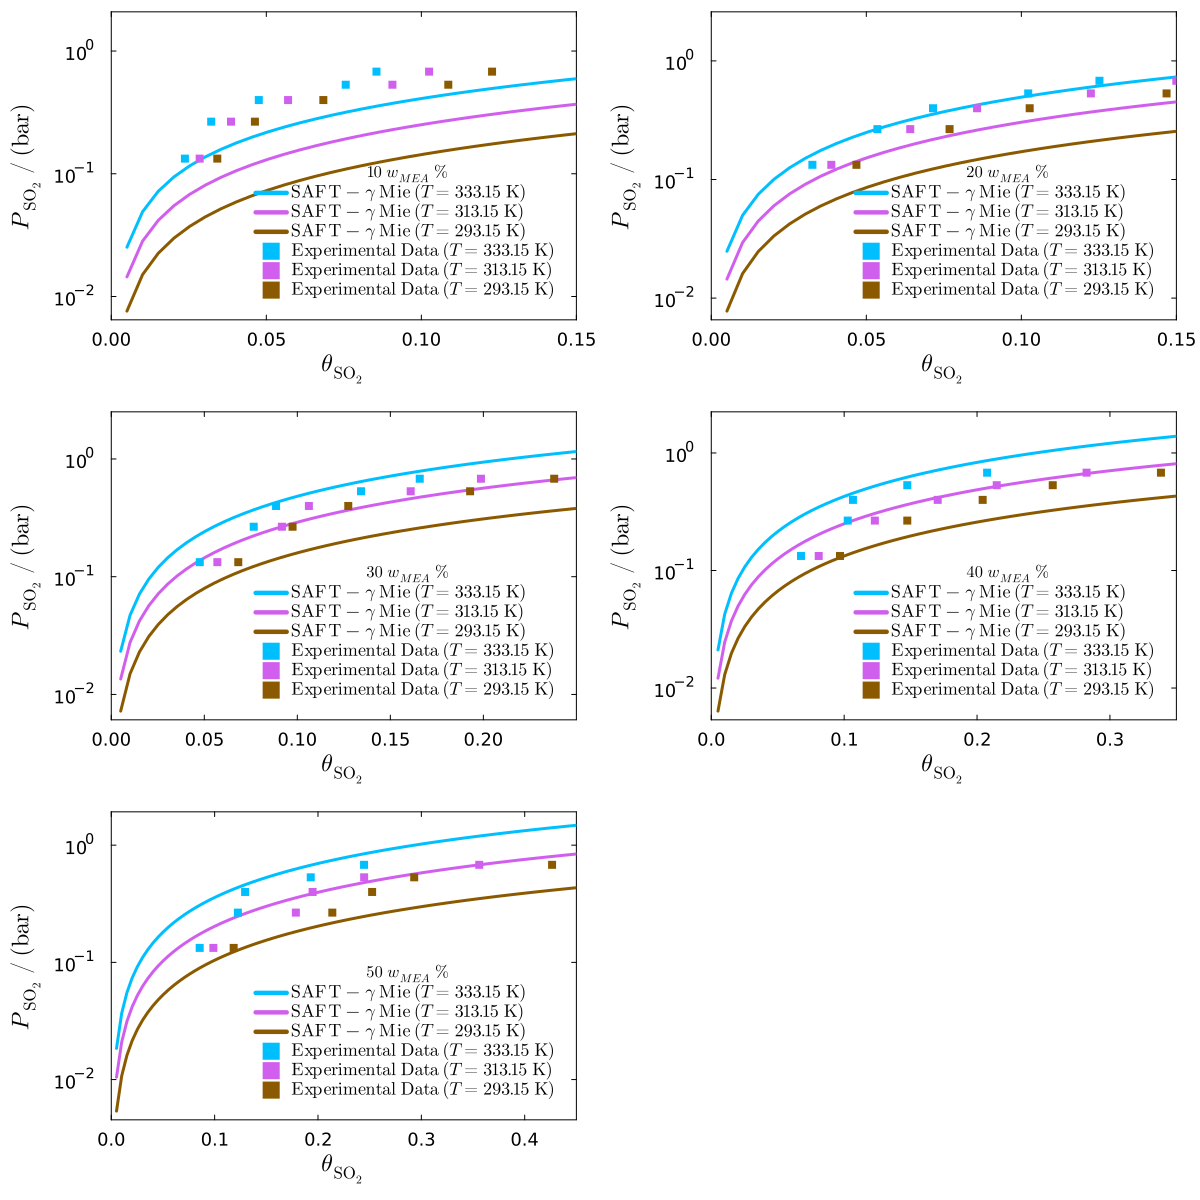

In [209]:
plt6 = plot(
    plt, plt2, plt3, plt4, plt5,
    layout = (3, 2),
    size = (1200, 1200)
)

#savefig(plt6, "C:\\Users\\fjm21\\OneDrive - Imperial College London\\Fourth Year\\Masters Project\\Figures_Formatted\\Param_Estimation\\Water_NH2_SO2_Epsilon_and_lambda_r\\p_SO2_combined.png")

In [112]:
function error_calc(model, data)
    
    N       = size(data)[1]
    T       = data[:, 1]
    w       = data[:, 2]
    loading = data[:, 3]

    partial_pred = zeros(N, 1)
    abs_diff = zeros(N, 1)
    exp_partial_pressure = data[:, 4]
    for i in 1:N
        partial_pred[i] = partial_SO2(model, T[i], w[i], loading[i])
        abs_diff[i] = abs(partial_pred[i] - exp_partial_pressure[i])
    end
    accum_abs_diff = sum(abs_diff)
    accum_abs_diff2 = sum(abs_diff./exp_partial_pressure)
    apd = accum_abs_diff2 * (100/N)
    return apd
end

error_calc (generic function with 1 method)

In [113]:
function get_df(csv_str)
df = CSV.read(csv_str, DataFrame)
    df_filt = df[3:end, :]
    for i in 1:size(df_filt)[2]
        df_filt[!, i] .= parse.(Float64, df_filt[!, i])
    end 
    return df_filt
end

get_df (generic function with 1 method)

In [211]:
df = get_df("SO2_EXP_All_Data.csv")
apd = error_calc(model, df)
print(apd)

36.65994759155526

In [192]:
model.params.lambda_r

5×5 PairParam{Float64}(["NH2", "CH2", "CH2OH", "H2O", "SO2"]) with values:
 10.354   14.063  52.305   13.085   12.412
 14.063   19.871  21.23   100.0     17.354
 52.305   21.23   22.699   19.619   18.511
 13.085  100.0    19.619   17.02    18.7249
 12.412   17.354  18.511   18.7249  15.213